In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heartdisease_data.csv')
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [3]:
df.rename({'63':'Age','1':'Sex','4':'Cp','140':'Trestbps','260':'Chol','0':'Fbs','1.1':'Restecg','112':'Thalach',
                       '1.2':'Exang','3':'Oldpeak','2':'Slope','?':'Ca','?.1':'Thal','2.1':'Target'}, axis=1, inplace=True)

In [4]:
df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       199 non-null    int64 
 1   Sex       199 non-null    int64 
 2   Cp        199 non-null    int64 
 3   Trestbps  199 non-null    object
 4   Chol      199 non-null    object
 5   Fbs       199 non-null    object
 6   Restecg   199 non-null    int64 
 7   Thalach   199 non-null    object
 8   Exang     199 non-null    object
 9   Oldpeak   199 non-null    object
 10  Slope     199 non-null    object
 11  Ca        199 non-null    object
 12  Thal      199 non-null    object
 13  Target    199 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 21.9+ KB


In [6]:
df.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
df.isnull().sum()

Age           0
Sex           0
Cp            0
Trestbps     56
Chol          7
Fbs           7
Restecg       0
Thalach      53
Exang        53
Oldpeak      56
Slope       102
Ca          197
Thal        165
Target        0
dtype: int64

In [10]:
df = df.drop(columns=['Slope','Ca','Thal'])
df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Target
0,44,1,4,130,209,0,1,127,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,2
2,55,1,4,142,228,0,1,149,1,2.5,1
3,66,1,3,110,213,1,2,99,1,1.3,0
4,66,1,3,120,0,0,1,120,0,-0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,1
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,0
196,55,1,4,122,223,1,1,100,0,0,2
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       199 non-null    int64 
 1   Sex       199 non-null    int64 
 2   Cp        199 non-null    int64 
 3   Trestbps  143 non-null    object
 4   Chol      192 non-null    object
 5   Fbs       192 non-null    object
 6   Restecg   199 non-null    int64 
 7   Thalach   146 non-null    object
 8   Exang     146 non-null    object
 9   Oldpeak   143 non-null    object
 10  Target    199 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 17.2+ KB


In [12]:
df.describe()

,Age,Sex,Cp,Restecg,Target
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,0.733668,1.517588
std,7.827080,0.171433,0.796928,0.684918,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [13]:
df=df.astype(dtype=float)

In [14]:
col_imp = ['Trestbps','Chol','Thalach','Oldpeak', 'Fbs', 'Exang']

for i in col_imp:
    df[i].fillna(df[i].median(), inplace = True)
    
df.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Target      0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       199 non-null    float64
 1   Sex       199 non-null    float64
 2   Cp        199 non-null    float64
 3   Trestbps  199 non-null    float64
 4   Chol      199 non-null    float64
 5   Fbs       199 non-null    float64
 6   Restecg   199 non-null    float64
 7   Thalach   199 non-null    float64
 8   Exang     199 non-null    float64
 9   Oldpeak   199 non-null    float64
 10  Target    199 non-null    float64
dtypes: float64(11)
memory usage: 17.2 KB


In [16]:
df.describe()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Target
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,132.673367,179.648241,0.341709,0.733668,122.105528,0.738693,1.362814,1.517588
std,7.827080,0.171433,0.796928,18.374852,112.360472,0.475479,0.684918,18.910312,0.440455,0.936426,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,125.500000,119.500000,0.000000,0.000000,112.000000,0.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.000000,1.000000,1.000000,130.000000,1.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,4.000000


In [17]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.96373685, 0.17631813, 0.62583065, ..., 1.68134561, 1.45900654,
        1.24498245],
       [0.08560374, 0.17631813, 0.62583065, ..., 0.59476171, 0.14686902,
        0.39575601],
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.59476171, 1.21745273,
        0.42461322],
       ...,
       [0.5548152 , 0.17631813, 0.62583065, ..., 1.68134561, 1.45900654,
        0.39575601],
       [0.17056384, 0.17631813, 0.62583065, ..., 0.59476171, 0.14686902,
        1.24498245],
       [0.34177131, 0.17631813, 1.89013499, ..., 0.59476171, 1.45900654,
        0.42461322]])

In [18]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 198, 198, 198], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(199, 11)


In [19]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Target
0,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,0.0
1,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,2.0
2,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0
3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,0.0
4,66.0,1.0,3.0,120.0,0.0,0.0,1.0,120.0,0.0,-0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
192,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,1.0
193,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,2.0
196,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0
197,58.0,1.0,4.0,130.0,385.0,1.0,2.0,120.0,1.0,1.5,0.0


In [20]:
df_new['Target'].replace([2,3,4], 1,inplace=True)
df_new['Target'].unique()

C:\Users\nikshit\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([0., 1.])

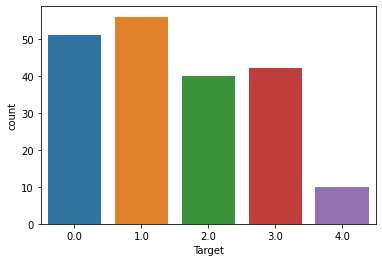

In [48]:
sns.countplot(df['Target'])

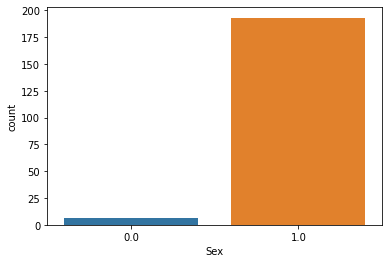

In [49]:
sns.countplot(df['Sex'])

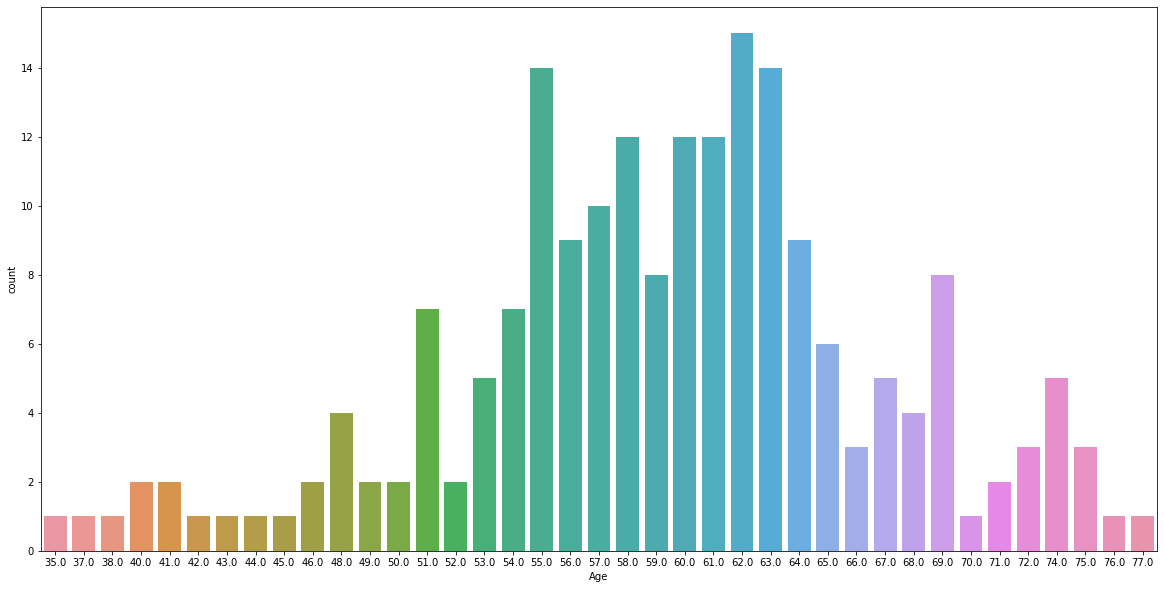

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(df['Age'])

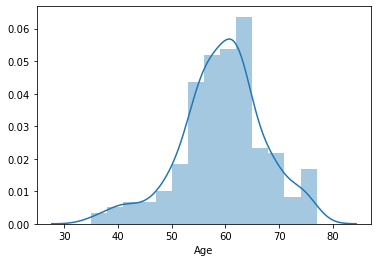

In [43]:
sns.distplot(df['Age'])

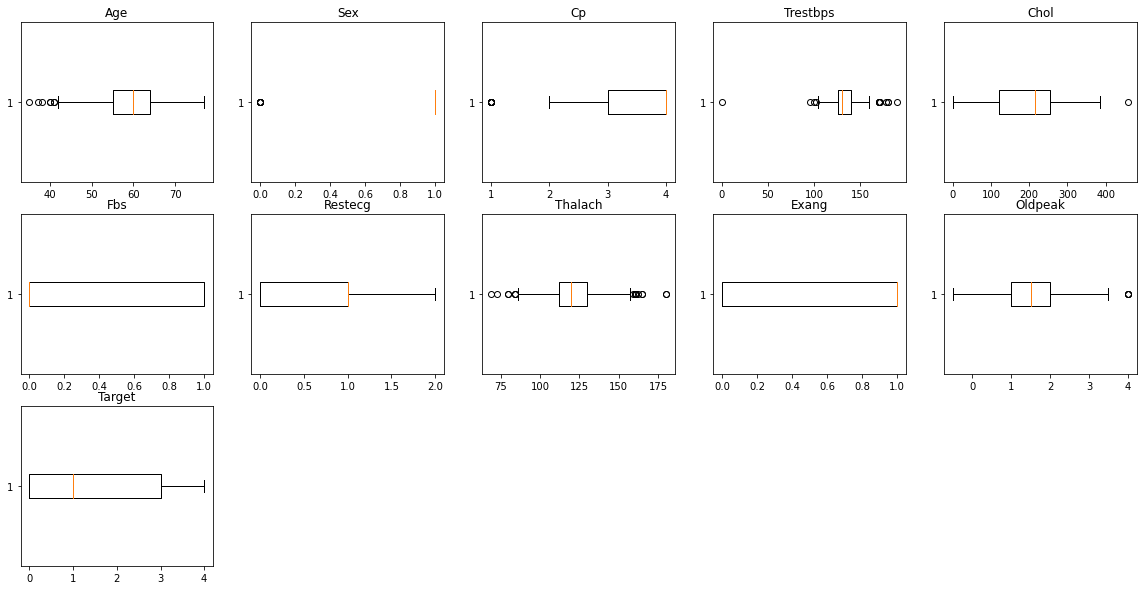

In [44]:
plt.figure(figsize=(20,10))

for col in range(len(df.columns)):
    if df.dtypes[col] != 'object':
        plt.subplot(3, 5, col+1)
        plt.boxplot(df[df.columns[col]], vert=False)
        plt.title(df.columns[col])

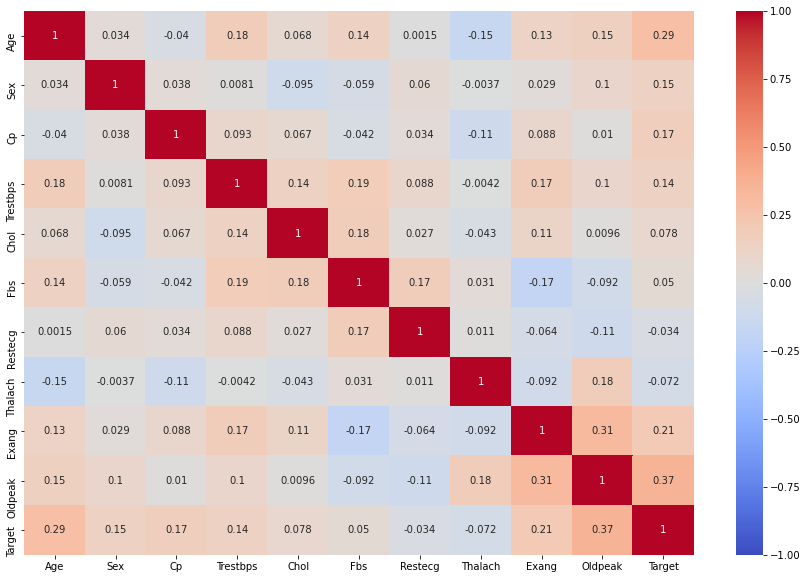

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(),
    vmin=-1.0,
    vmax=1.0,
    cmap='coolwarm',
    center=None,
    robust=False,
    annot=True
)

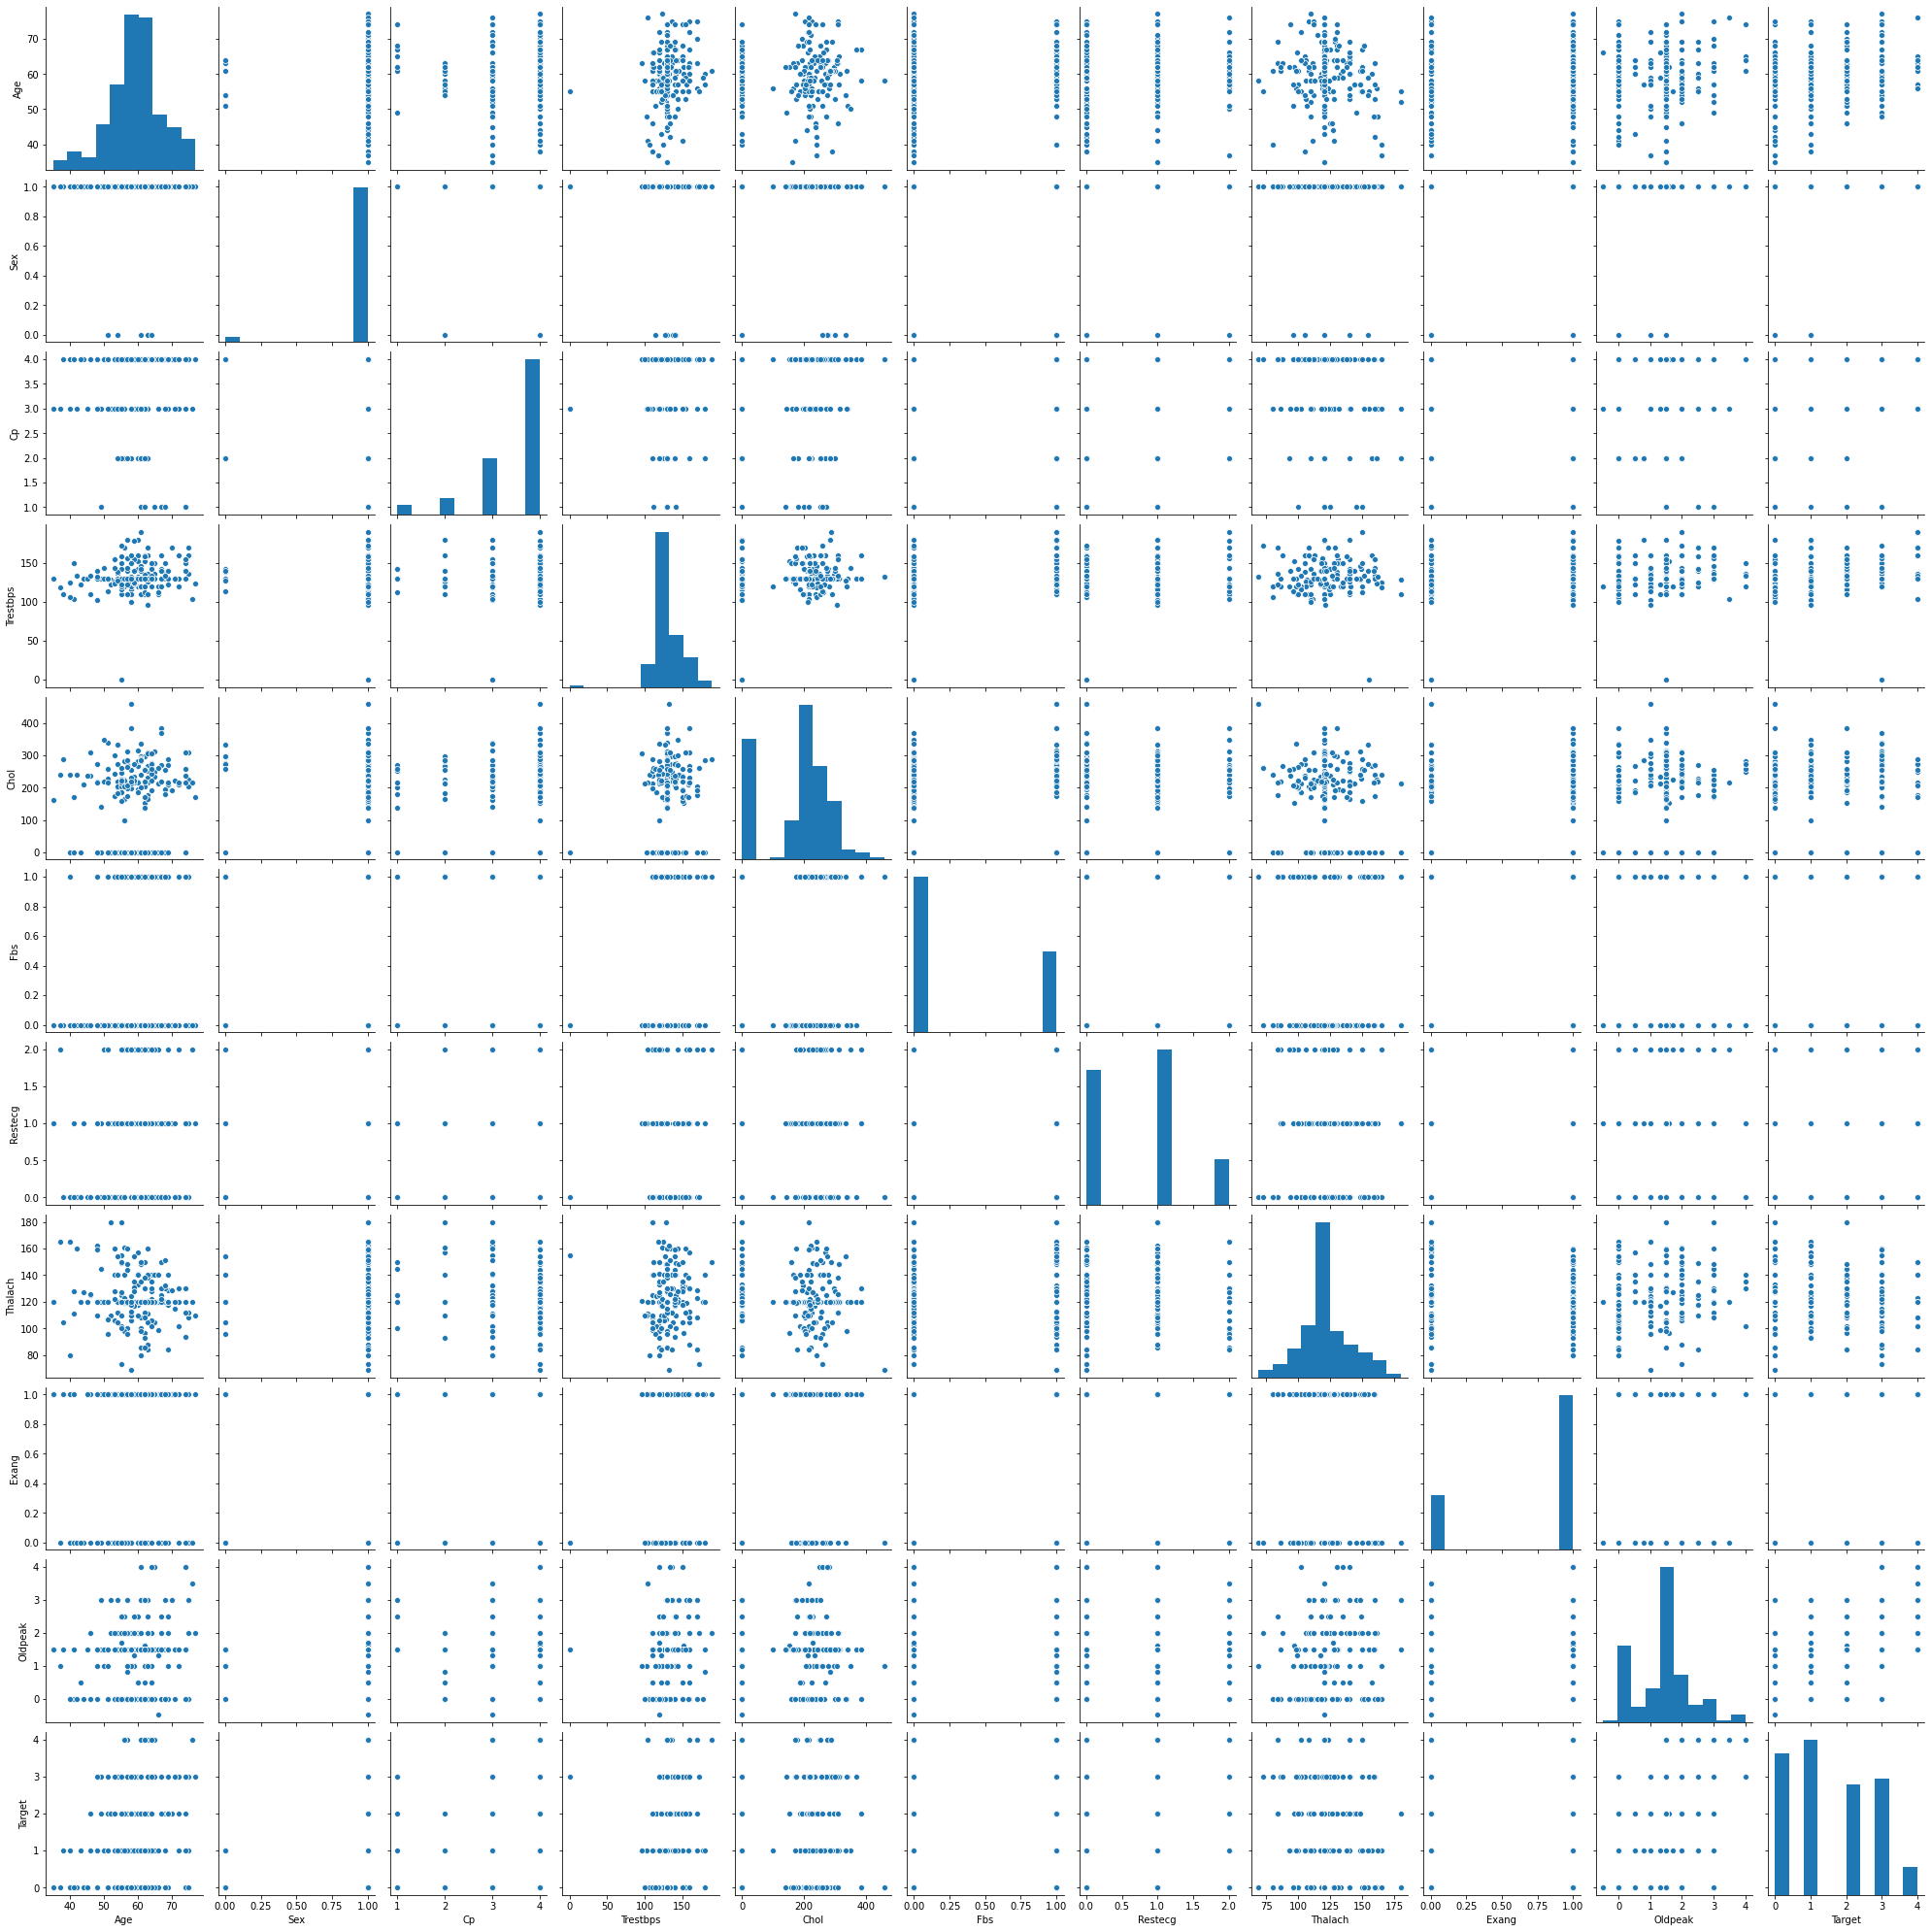

In [50]:
sns.pairplot(
    df
)

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 198
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       180 non-null    float64
 1   Sex       180 non-null    float64
 2   Cp        180 non-null    float64
 3   Trestbps  180 non-null    float64
 4   Chol      180 non-null    float64
 5   Fbs       180 non-null    float64
 6   Restecg   180 non-null    float64
 7   Thalach   180 non-null    float64
 8   Exang     180 non-null    float64
 9   Oldpeak   180 non-null    float64
 10  Target    180 non-null    float64
dtypes: float64(11)
memory usage: 16.9 KB


In [22]:
X = df_new.drop('Target', axis = 1)
y = df_new['Target']

In [23]:
X.shape

(180, 10)

In [24]:
y.shape

(180,)

In [25]:
y = y.values.reshape(-1,1)

In [26]:
y.shape

(180, 1)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9
0,-1.992004,0.0,0.615882,-0.215350,0.271294,-0.698286,0.380582,0.334916,-1.758098,-1.416913
1,0.076118,0.0,0.615882,-0.087630,0.351391,-0.698286,0.380582,1.059897,0.568796,0.162635
2,-0.570170,0.0,0.615882,0.550971,0.440389,-0.698286,0.380582,1.561807,0.568796,1.215667
3,0.851664,0.0,-1.063796,-1.492553,0.306893,1.432078,1.838132,-1.226581,0.568796,-0.047971
4,0.851664,0.0,-1.063796,-0.853952,-1.588752,-0.698286,0.380582,-0.055458,-1.758098,-1.943429
...,...,...,...,...,...,...,...,...,...,...
175,0.334634,0.0,0.615882,1.572732,-0.075796,-0.698286,0.380582,0.948362,0.568796,-1.416913
176,-1.733489,0.0,0.615882,0.040090,1.170168,-0.698286,-1.076967,0.279149,-1.758098,-1.416913
177,-0.570170,0.0,0.615882,-0.726231,0.395890,1.432078,0.380582,-1.170813,-1.758098,-1.416913
178,-0.182397,0.0,0.615882,-0.215350,1.837648,1.432078,1.838132,-0.055458,0.568796,0.162635


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [32]:
predlr = lr.predict(X_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.7777777777777778
[[ 3  8]
 [ 2 32]]
              precision    recall  f1-score   support

         0.0       0.60      0.27      0.37        11
         1.0       0.80      0.94      0.86        34

    accuracy                           0.78        45
   macro avg       0.70      0.61      0.62        45
weighted avg       0.75      0.78      0.75        45



In [34]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7555555555555555
[[ 1 10]
 [ 1 33]]
              precision    recall  f1-score   support

         0.0       0.50      0.09      0.15        11
         1.0       0.77      0.97      0.86        34

    accuracy                           0.76        45
   macro avg       0.63      0.53      0.51        45
weighted avg       0.70      0.76      0.69        45



C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
predknn = knn.predict(X_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7555555555555555
[[ 3  8]
 [ 3 31]]
              precision    recall  f1-score   support

         0.0       0.50      0.27      0.35        11
         1.0       0.79      0.91      0.85        34

    accuracy                           0.76        45
   macro avg       0.65      0.59      0.60        45
weighted avg       0.72      0.76      0.73        45



<ipython-input-35-751dd80830b7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.6666666666666666
[[ 3  8]
 [ 7 27]]
              precision    recall  f1-score   support

         0.0       0.30      0.27      0.29        11
         1.0       0.77      0.79      0.78        34

    accuracy                           0.67        45
   macro avg       0.54      0.53      0.53        45
weighted avg       0.66      0.67      0.66        45



In [52]:
import joblib
joblib.dump(lr,"heart_disease.pkl")

['heart_disease.pkl']